## DATA-255 Homework-4, Part 2 YOLOv8


Github : https://github.com/jyanimaulik/Deep-Learning/tree/main/Homework%204

### Installing YOLOv8

In [1]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [2]:
# importing necessary libraries
from ultralytics import YOLO
from IPython.display import display, Image

### Training to our Custom Butterfly Dataset

In [3]:
# code to mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# setting the path to our google drive where our dataset is located
%cd /content/drive/MyDrive/DATA-255/dataset/data/

/content/drive/MyDrive/DATA-255/dataset/data


In [5]:
# training the model
!yolo task=detect mode=train model=yolov8s.pt data=data.yaml epochs=25 imgsz=224 plots=True

100% 21.5M/21.5M [00:00<00:00, 99.0MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=25, patience=50, batch=16, imgsz=224, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=

In [6]:
# to show the list of the files in runs/detect/train/ which created by training the model
!ls runs/detect/train/

args.yaml					    R_curve.png       train_batch60.jpg
confusion_matrix.png				    results.csv       train_batch61.jpg
events.out.tfevents.1709191844.69aec531d930.1604.0  results.png       train_batch62.jpg
F1_curve.png					    train_batch0.jpg  val_batch0_labels.jpg
P_curve.png					    train_batch1.jpg  val_batch0_pred.jpg
PR_curve.png					    train_batch2.jpg  weights


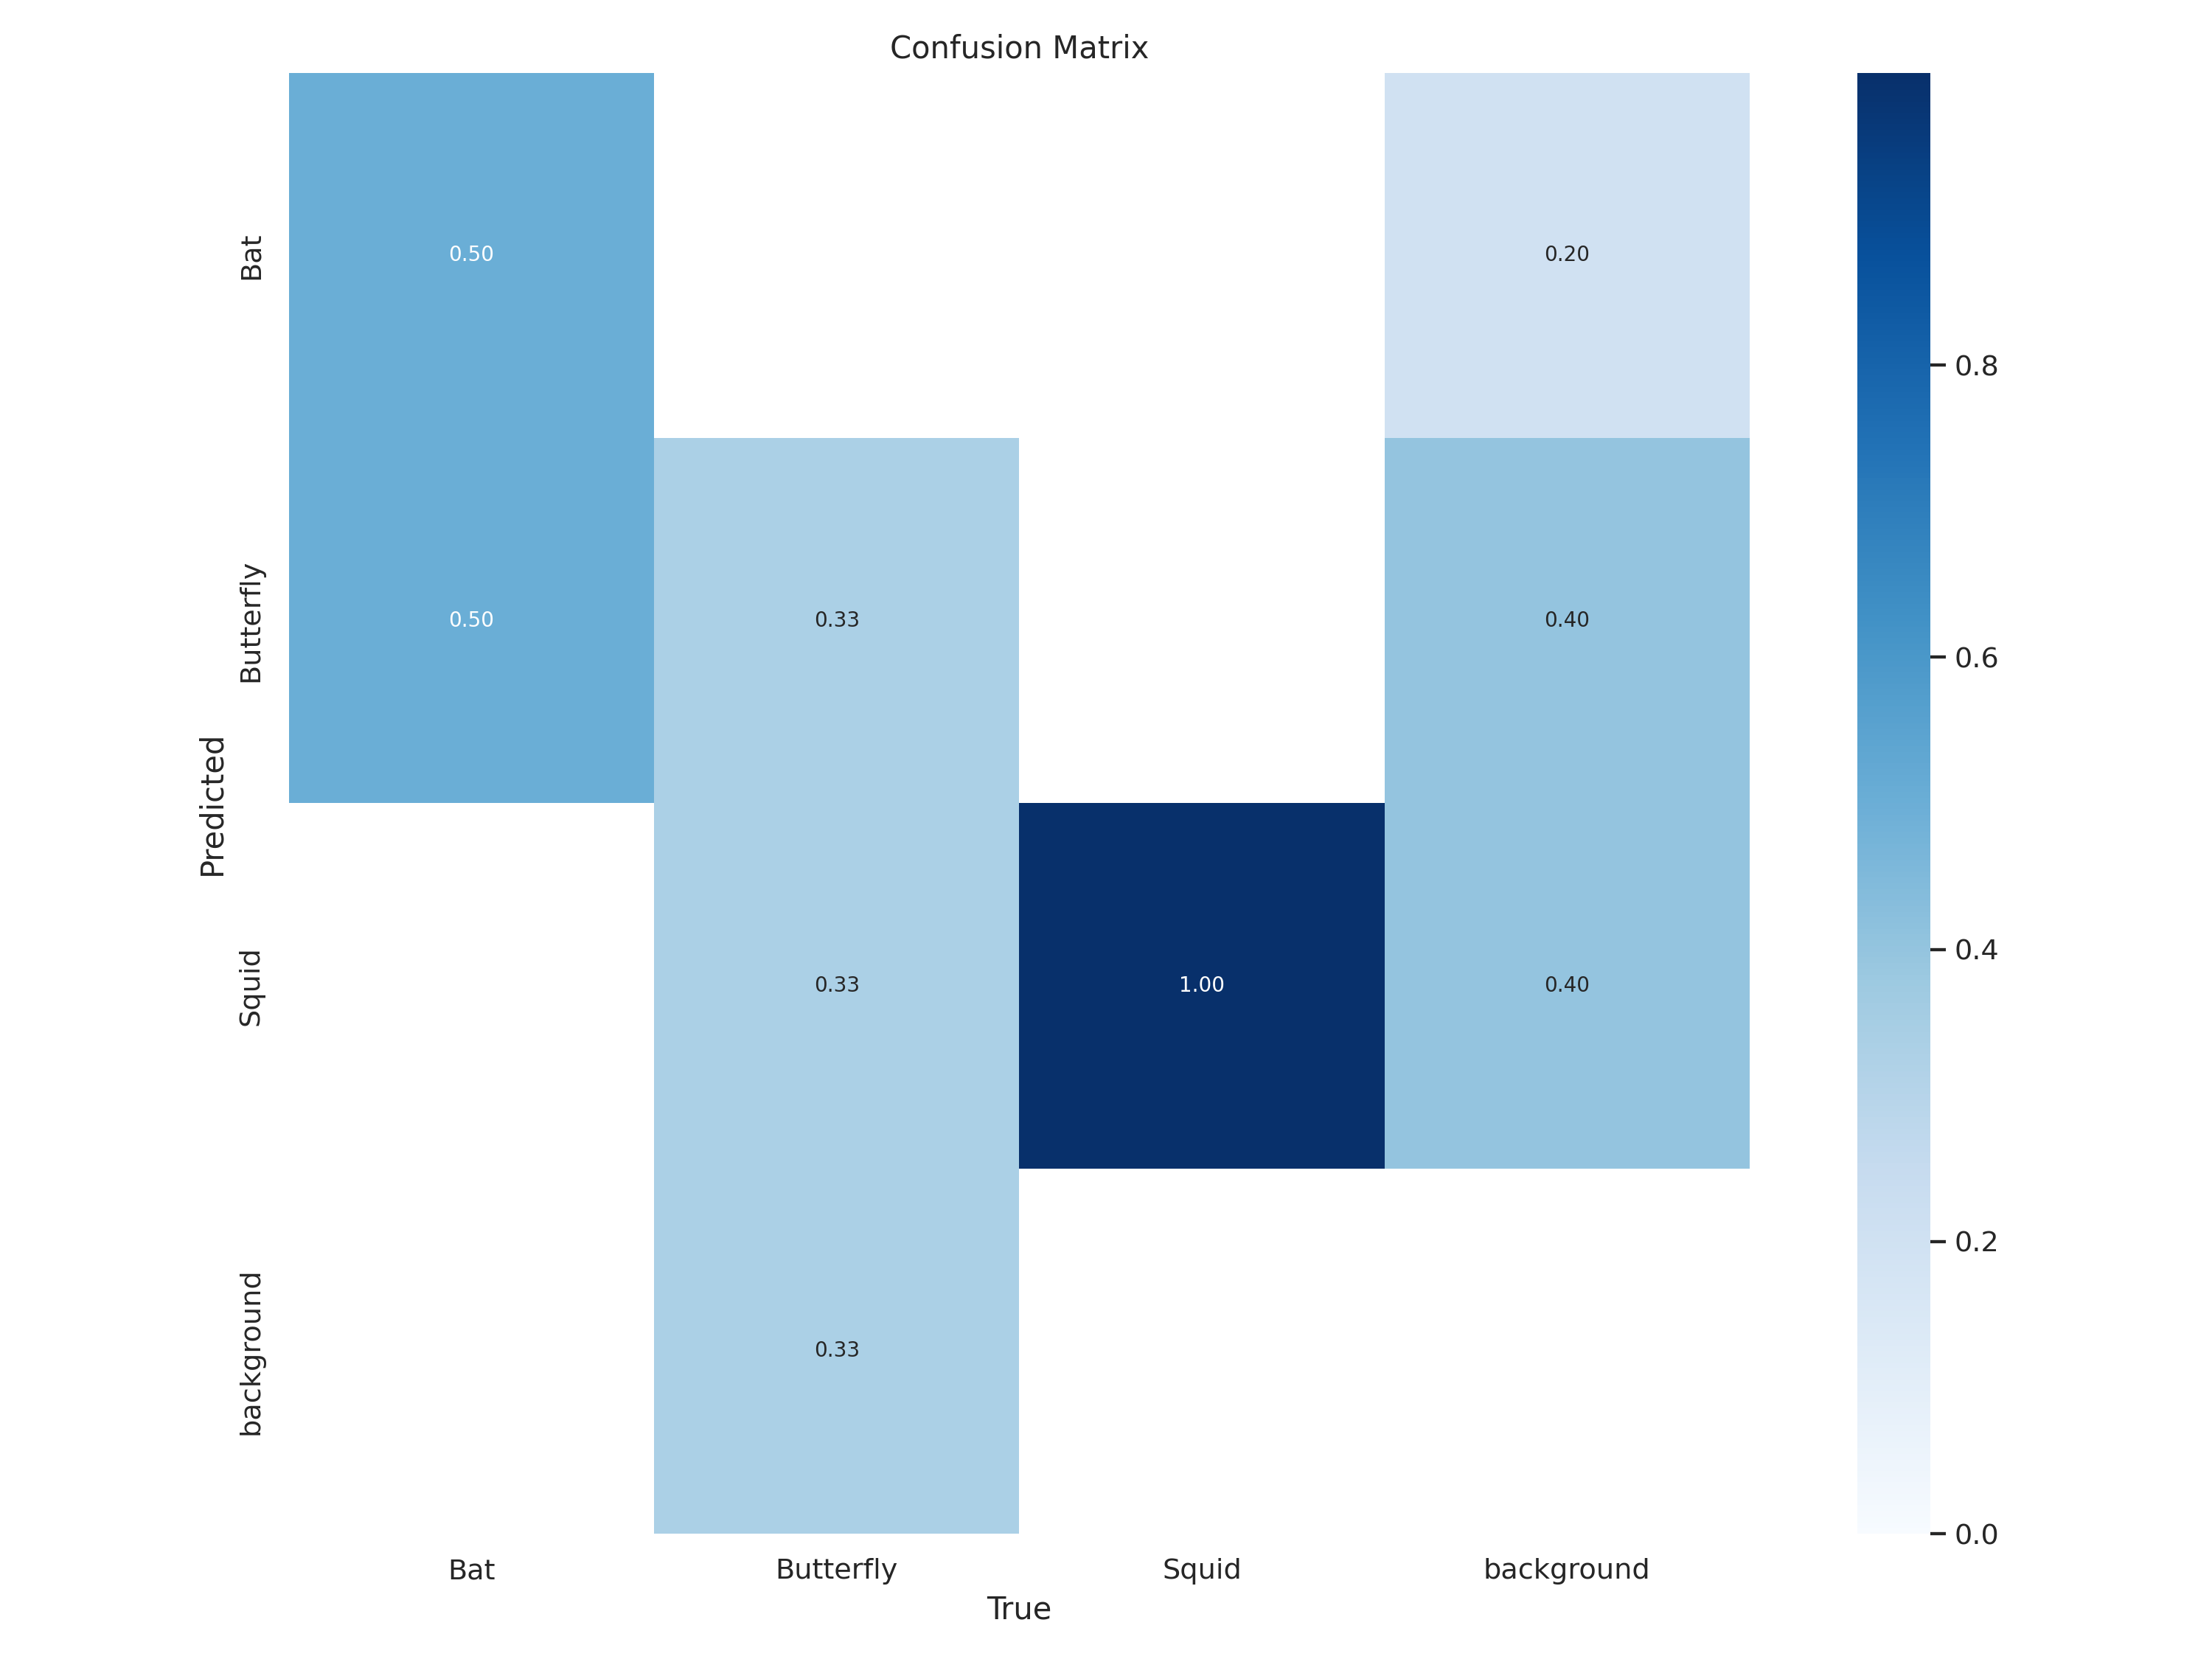

In [7]:
# to display the confusion matrix
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

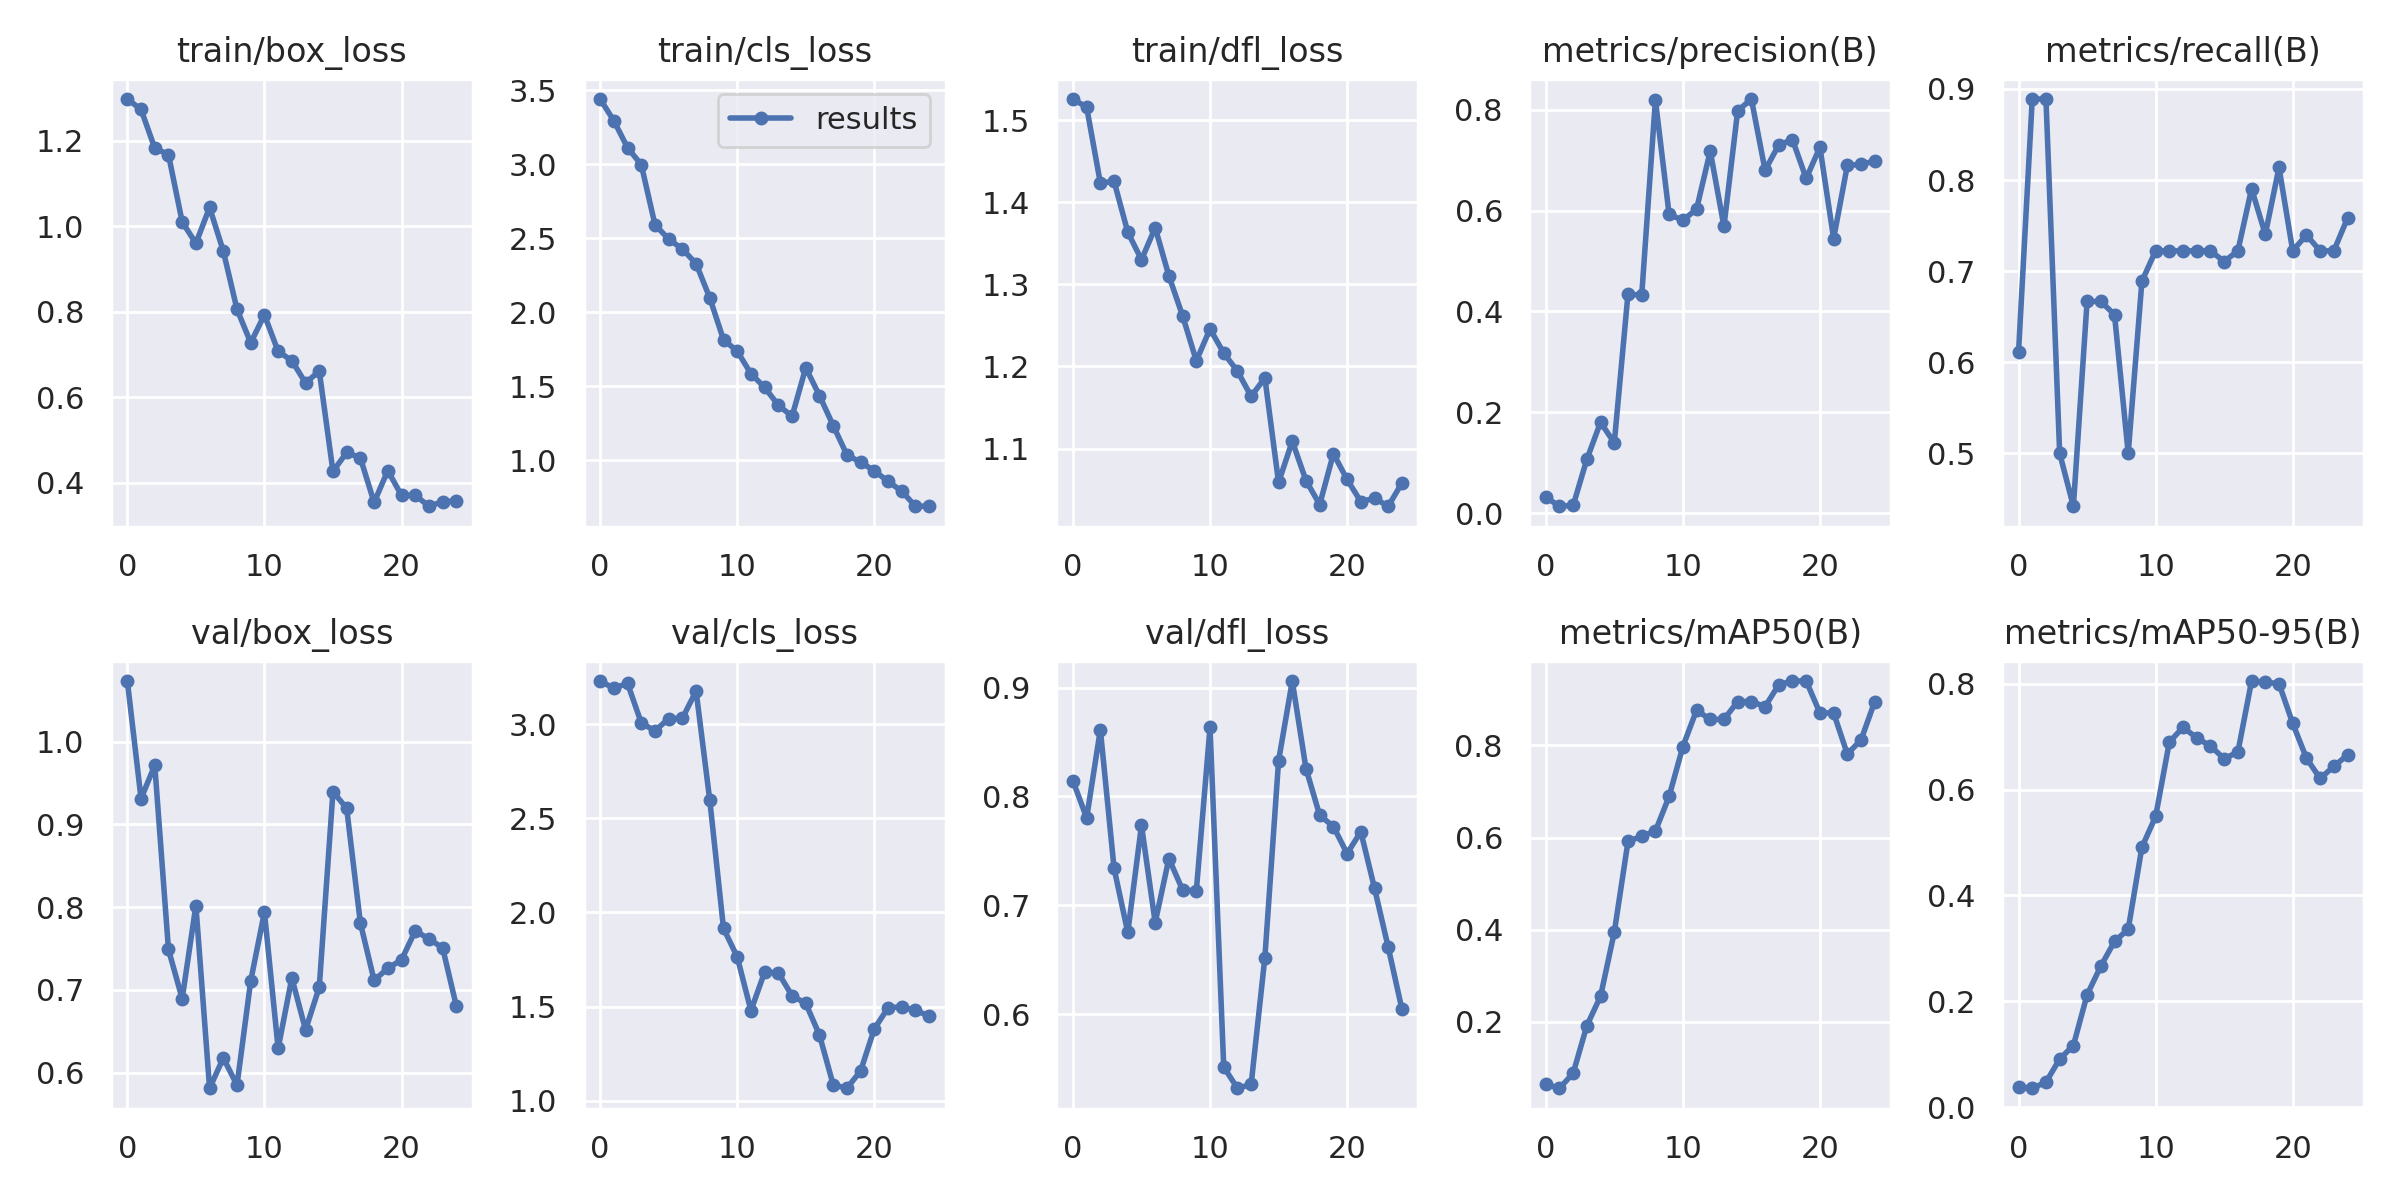

In [8]:
# to display the results got after training the model
Image(filename='runs/detect/train/results.png', width=600)

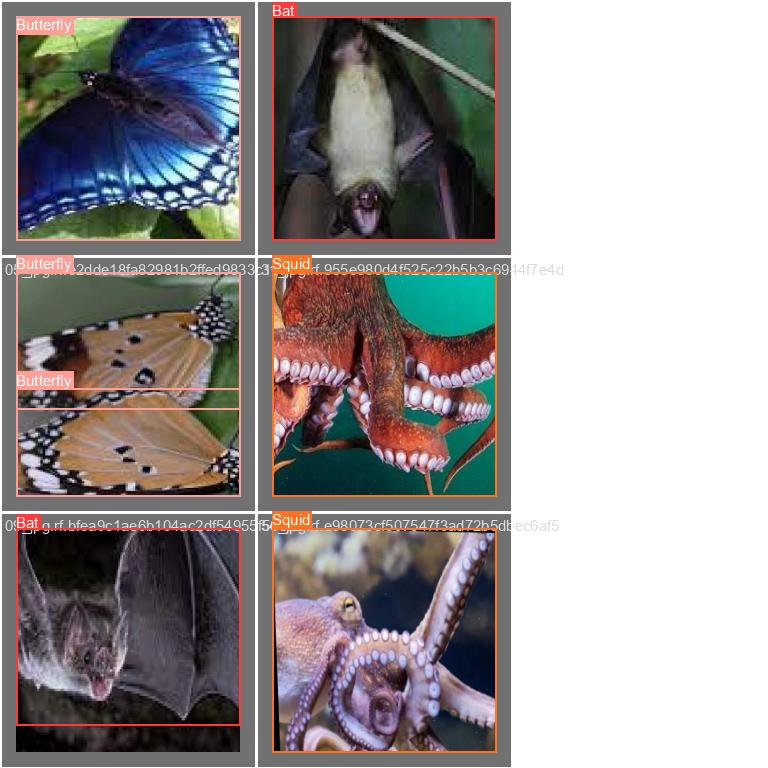

In [9]:
Image(filename='runs/detect/train/val_batch0_labels.jpg', width=600)

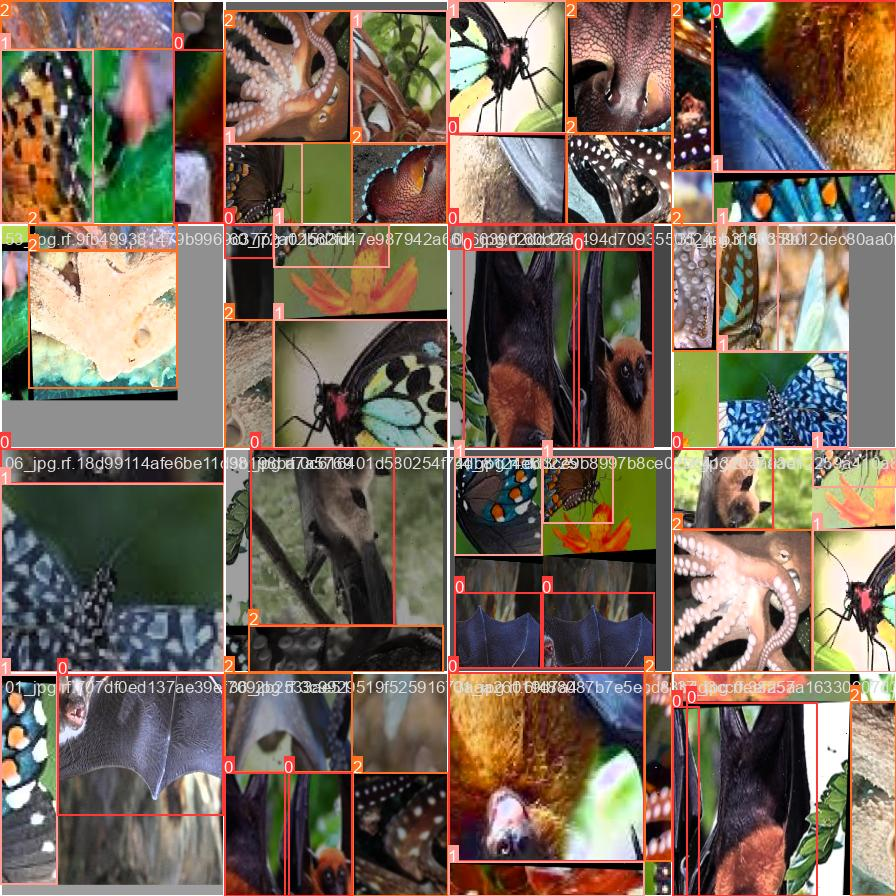

In [10]:
Image(filename='runs/detect/train/train_batch0.jpg', width=600)

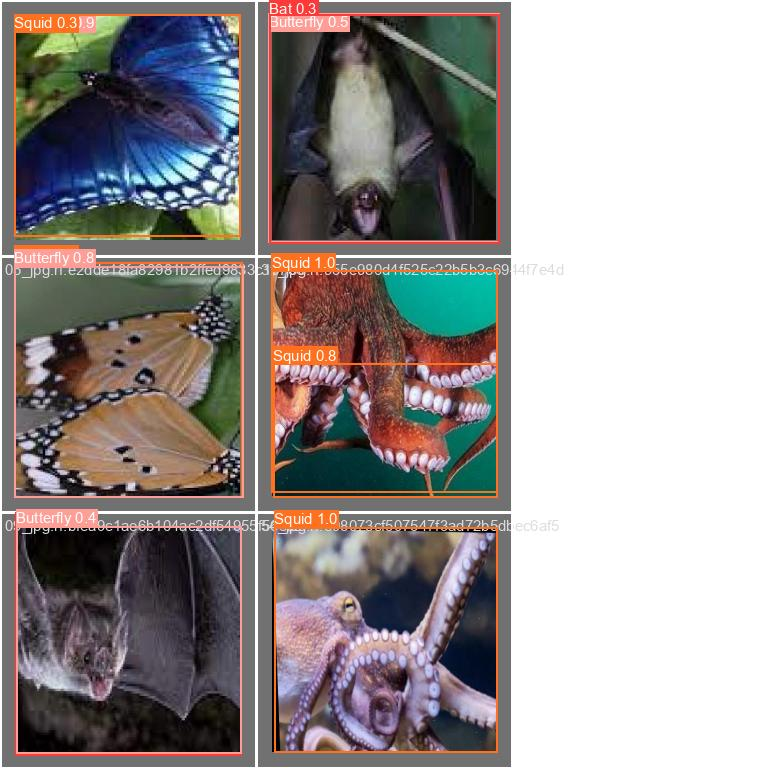

In [11]:
Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)

### Validate Custom Model

In [12]:
# validating the custom model
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

2024-02-29 07:32:56.706483: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-29 07:32:56.706538: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-29 07:32:56.708042: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-29 07:32:57.988219: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/DATA-255/dataset/data/valid/labels.c

### Inference with Custom Model

In [13]:
# inference with the custom model
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=test/images save=True

2024-02-29 07:33:11.658364: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-29 07:33:11.658427: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-29 07:33:11.660238: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-29 07:33:13.223365: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
image 1/6 /content/drive/MyDrive/DATA-255/dataset/data/test/images/02_jpg

**NOTE:** Let's see the few results obtained by our model.

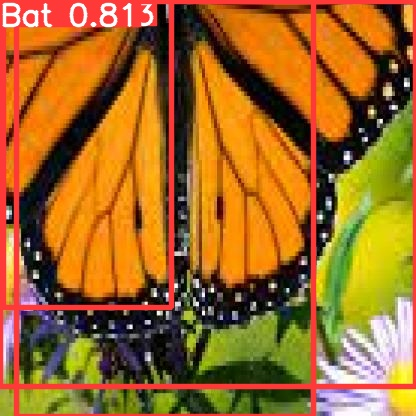

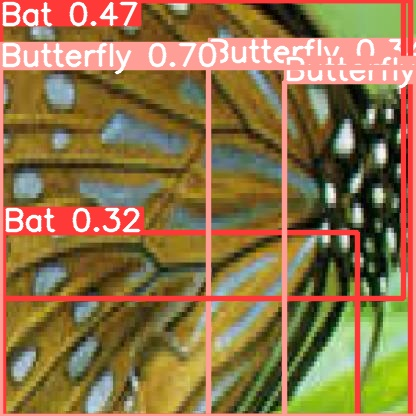

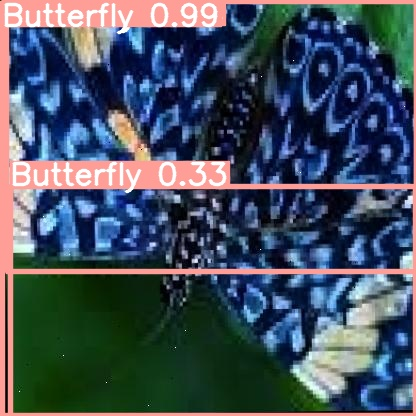

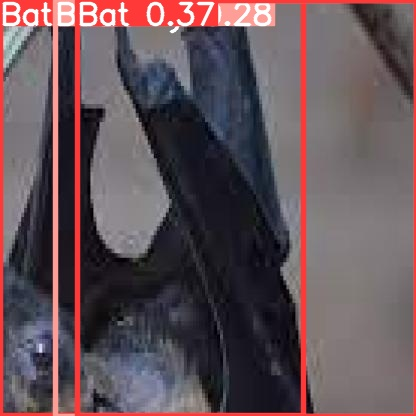

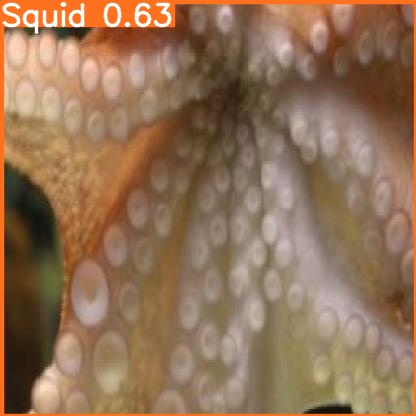

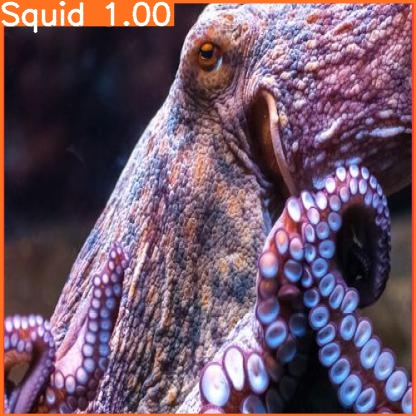

In [25]:
# Displaying the images predicted by the model using the test dataset

import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/*.jpg')[:6]:
      display(Image(filename=image_path, width=150))
      print("\n")

# Training model again with 50 epochs

In [15]:
# training the model
!yolo task=detect mode=train model=yolov8s.pt data=data.yaml epochs=50 imgsz=224 plots=True

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=50, patience=50, batch=16, imgsz=224, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace

In [16]:
# to show the list of the files in runs/detect/train/ which created by training the model
!ls runs/detect/train2/

args.yaml					    R_curve.png		train_batch162.jpg
confusion_matrix.png				    results.csv		train_batch1.jpg
events.out.tfevents.1709192007.69aec531d930.3069.0  results.png		train_batch2.jpg
F1_curve.png					    train_batch0.jpg	val_batch0_labels.jpg
P_curve.png					    train_batch160.jpg	val_batch0_pred.jpg
PR_curve.png					    train_batch161.jpg	weights


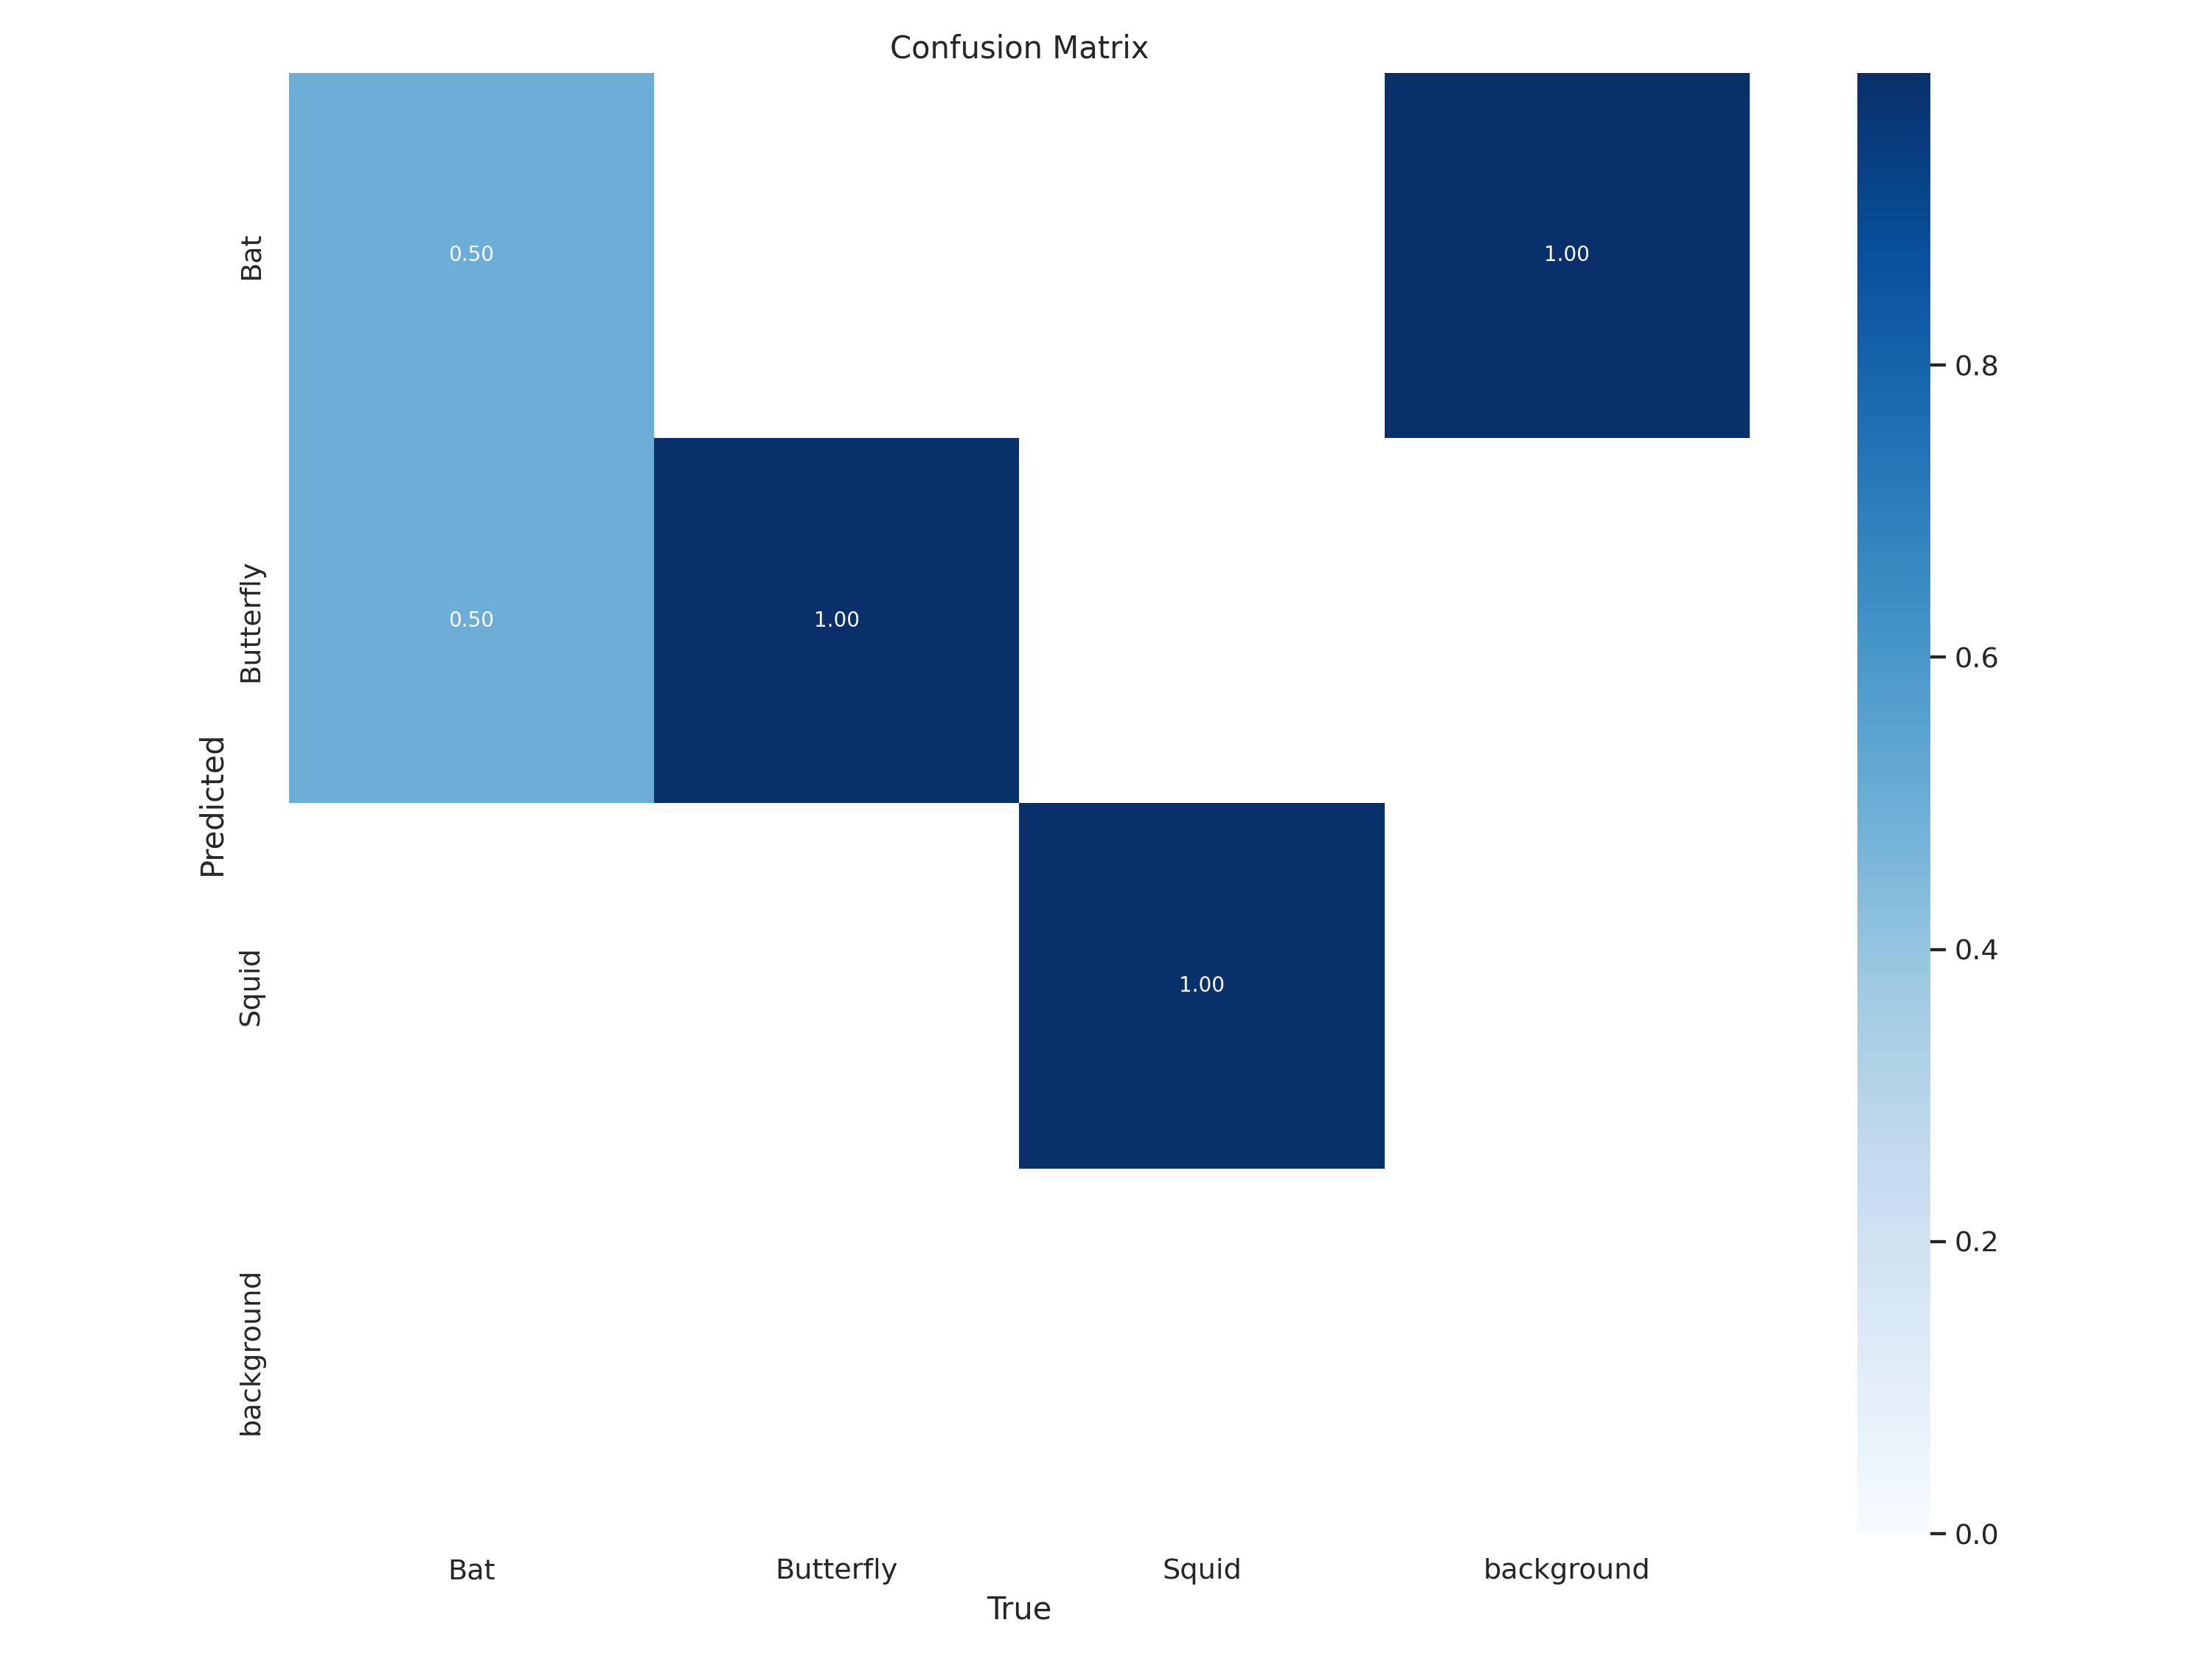

In [17]:
# to display the confusion matrix
Image(filename='runs/detect/train2/confusion_matrix.png', width=600)

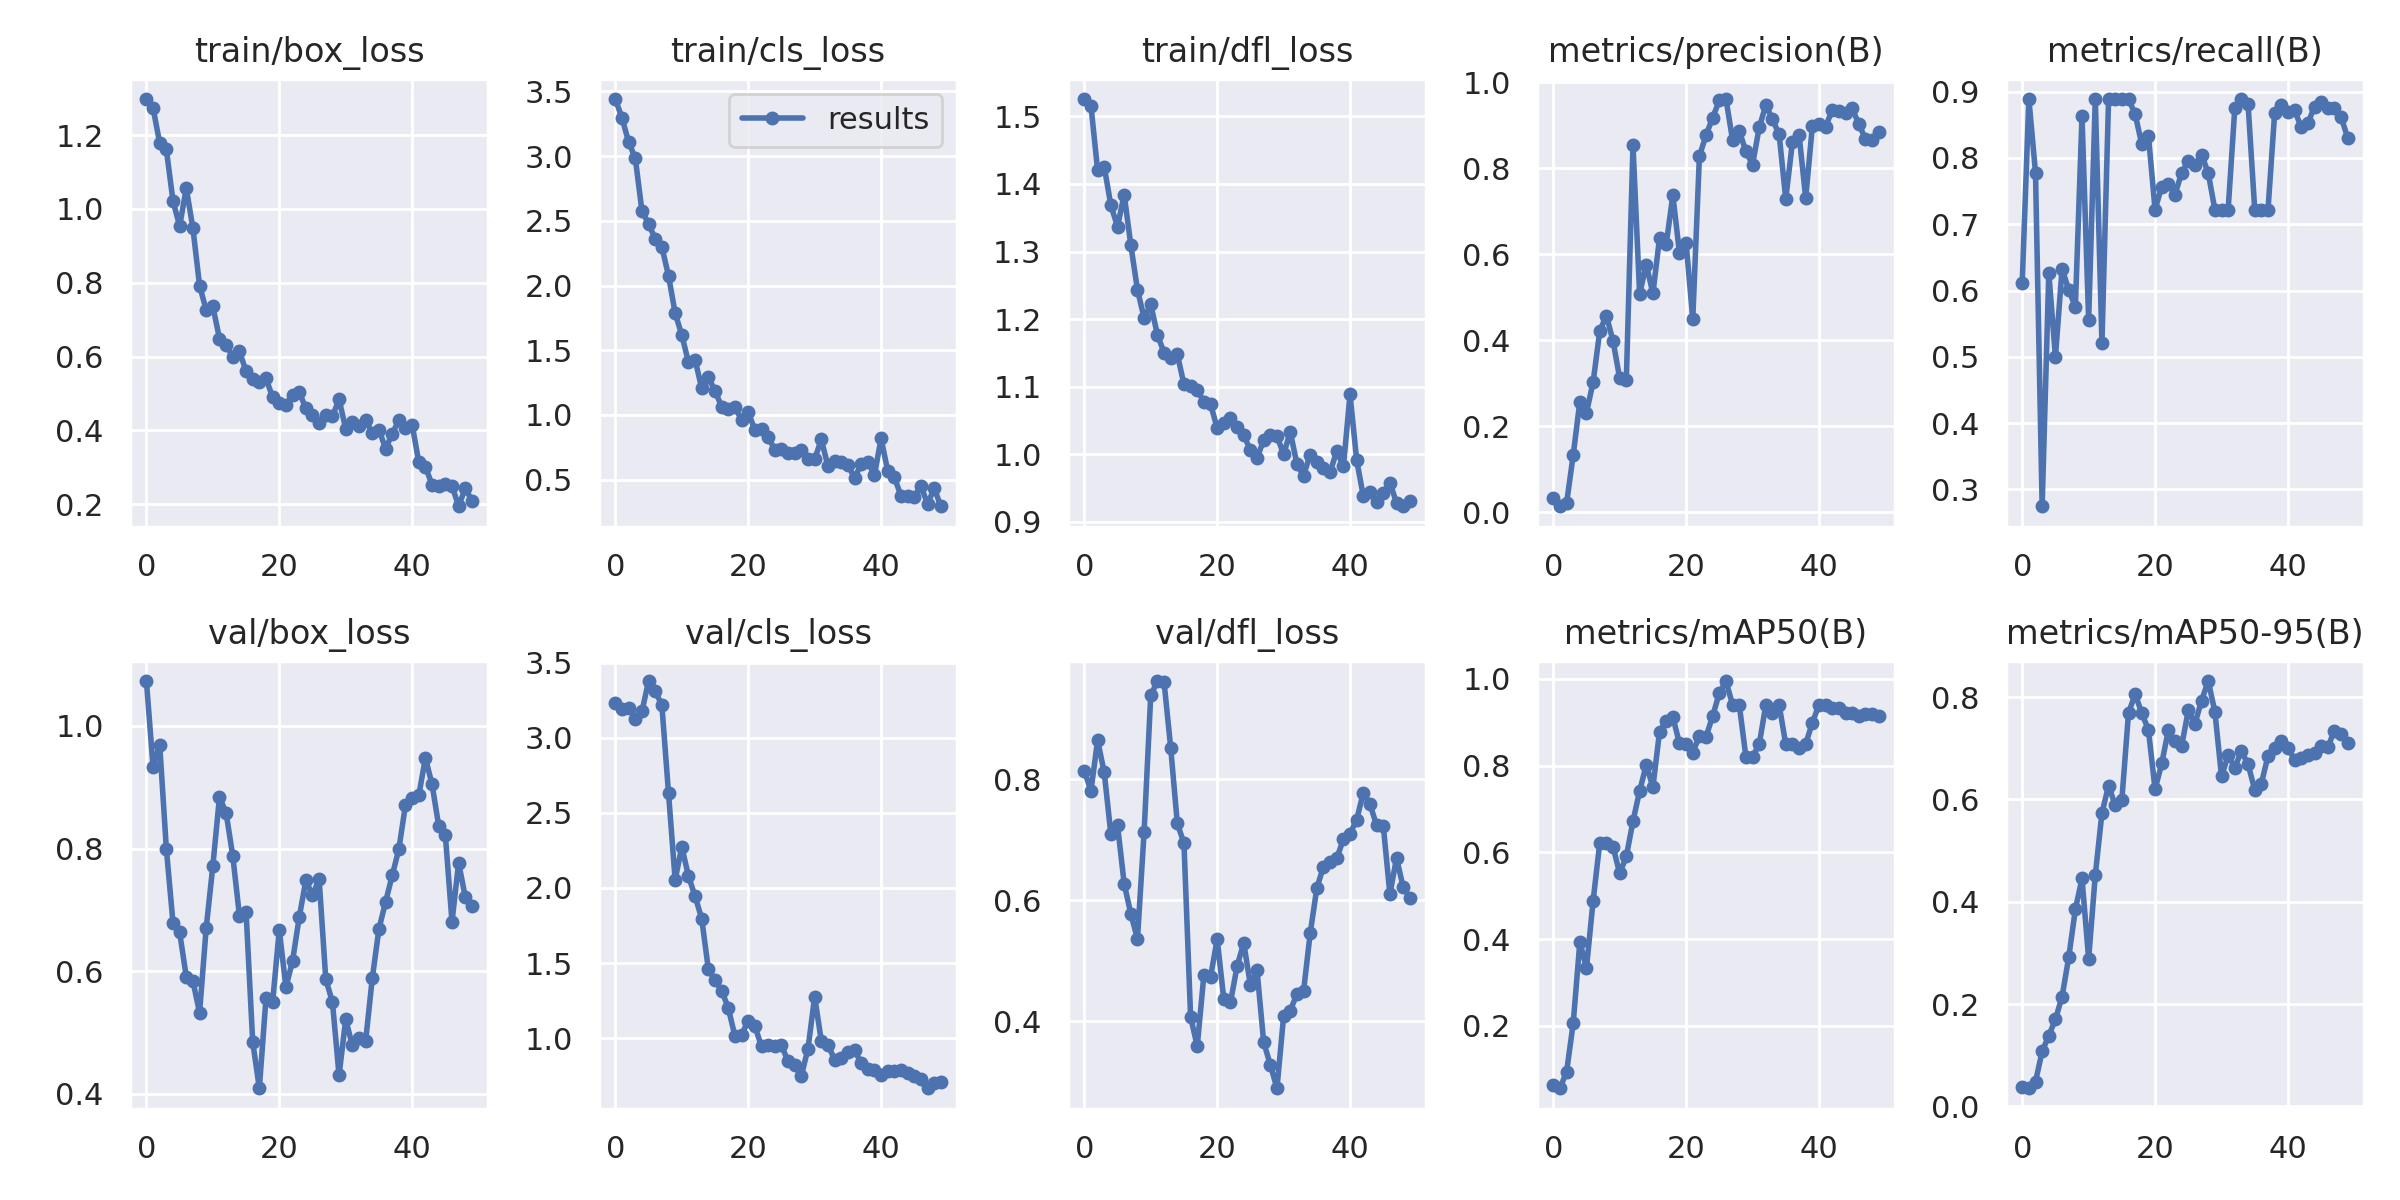

In [18]:
# to display the results got after training the model
Image(filename='runs/detect/train2/results.png', width=600)

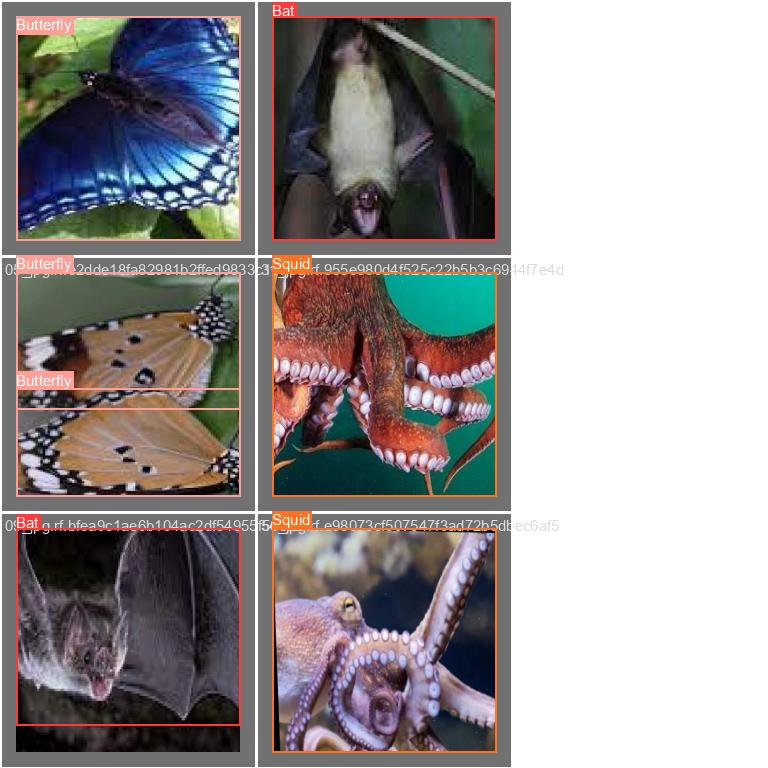

In [19]:
Image(filename='runs/detect/train2/val_batch0_labels.jpg', width=600)

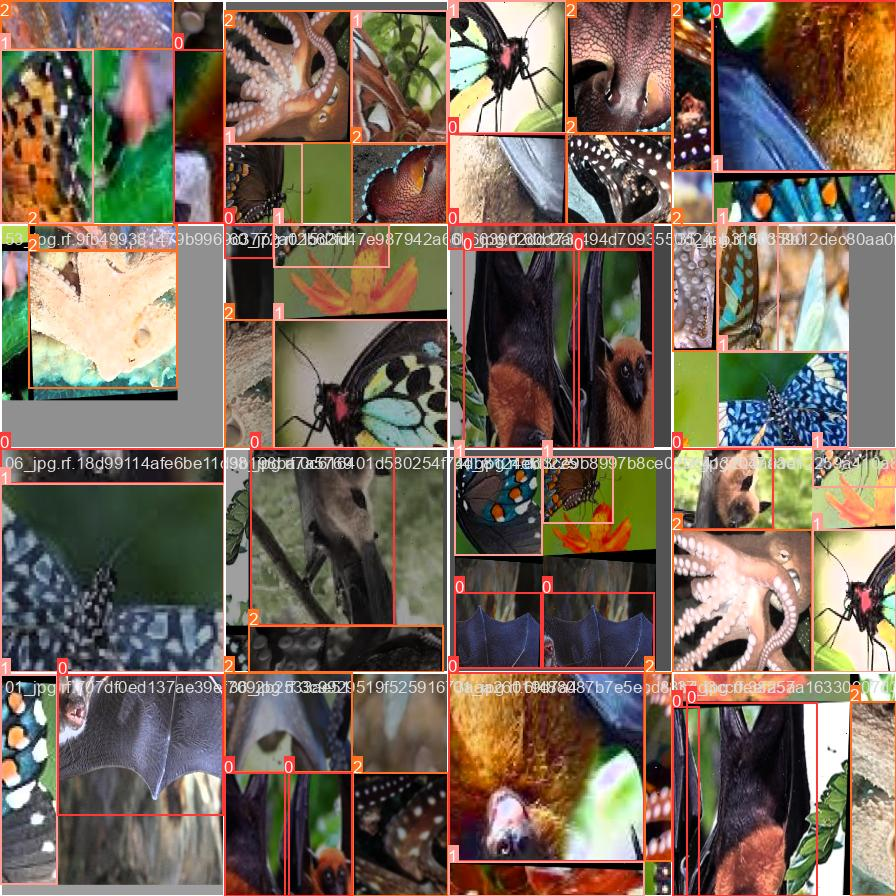

In [20]:
Image(filename='runs/detect/train2/train_batch0.jpg', width=600)

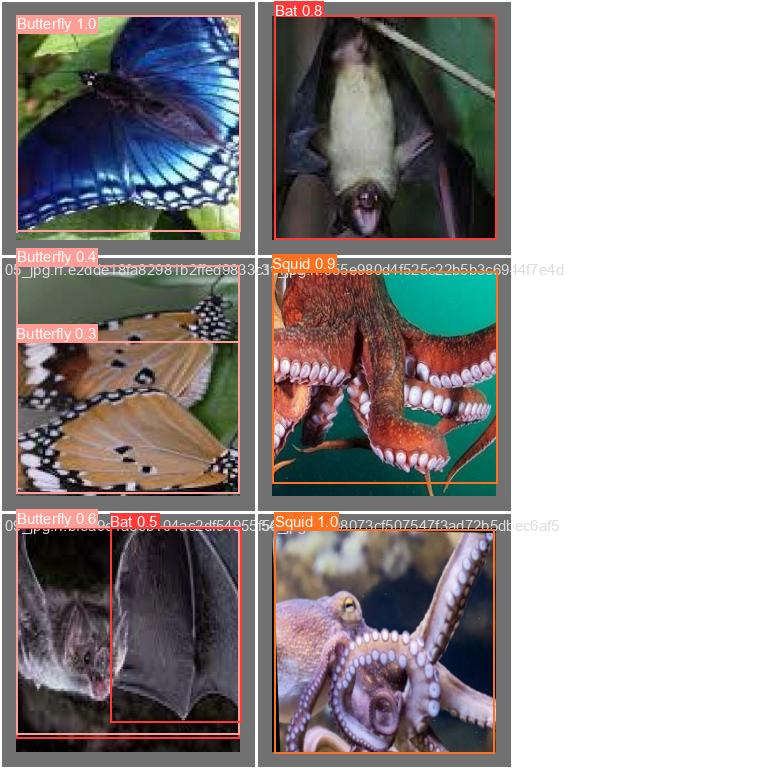

In [21]:
Image(filename='runs/detect/train2/val_batch0_pred.jpg', width=600)

### Validate Custom Model

In [22]:
# validating the custom model
!yolo task=detect mode=val model=runs/detect/train2/weights/best.pt data=data.yaml

2024-02-29 07:37:21.946688: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-29 07:37:21.946740: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-29 07:37:21.948046: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-29 07:37:23.301919: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/DATA-255/dataset/data/valid/labels.c

### Inference with Custom Model

In [23]:
# inference with the custom model
!yolo task=detect mode=predict model=runs/detect/train2/weights/best.pt conf=0.25 source=test/images save=True

2024-02-29 07:37:36.968044: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-29 07:37:36.968109: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-29 07:37:36.970151: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-29 07:37:38.507091: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
image 1/6 /content/drive/MyDrive/DATA-255/dataset/data/test/images/02_jpg

**NOTE:** Let's see the few results obtained by our model.

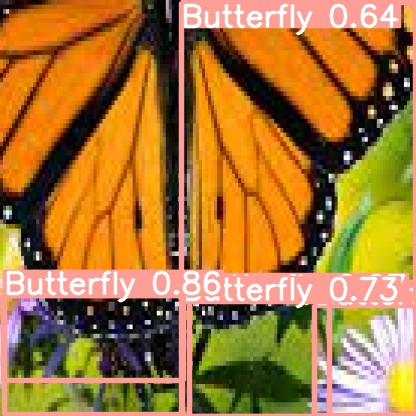

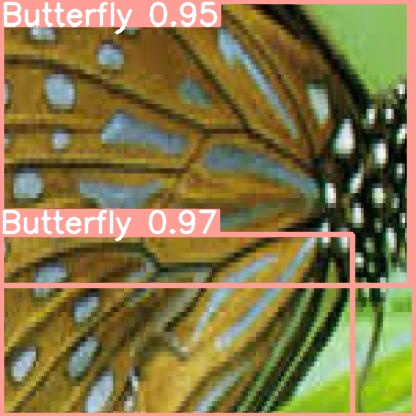

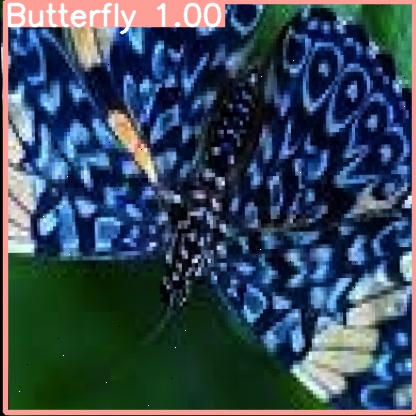

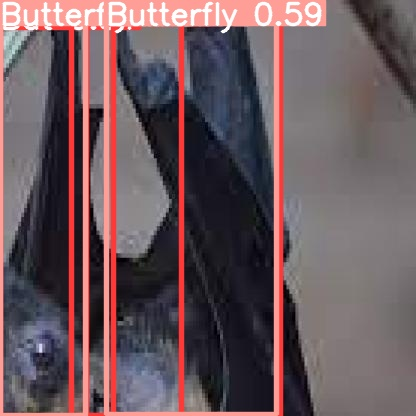

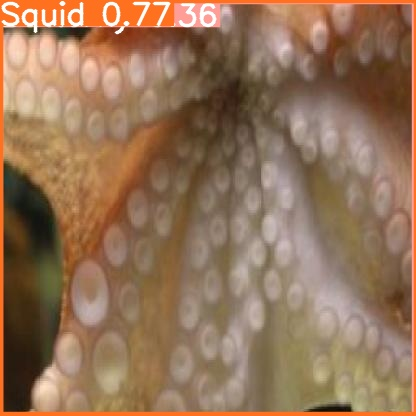

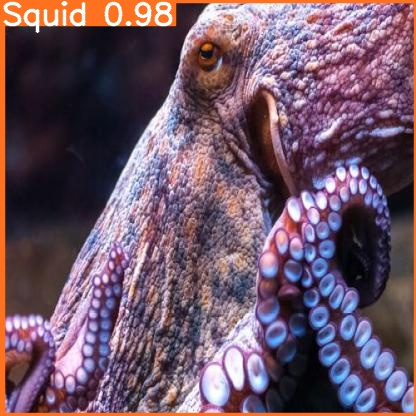

In [26]:
# Displaying the images predicted by the model using the test dataset

import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict2/*.jpg')[:6]:
      display(Image(filename=image_path, width=150))
      print("\n")